# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | al wajh
Processing Record 3 of Set 1 | khost
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | helong
Processing Record 7 of Set 1 | crane
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | laojunmiao
Processing Record 12 of Set 1 | yanam
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | praia da vitoria
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | ghadamis
Processing Record 21 of Set 1 | port isabel
Processing Record 22 of Set 1 | plettenbe

Processing Record 38 of Set 4 | udachny
Processing Record 39 of Set 4 | pikeville
Processing Record 40 of Set 4 | mo i rana
Processing Record 41 of Set 4 | vytegra
Processing Record 42 of Set 4 | papatowai
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | mahina
Processing Record 45 of Set 4 | areka
Processing Record 46 of Set 4 | turpan
Processing Record 47 of Set 4 | nyagan
Processing Record 48 of Set 4 | tidjikja
Processing Record 49 of Set 4 | adrar
Processing Record 0 of Set 5 | sandersville
Processing Record 1 of Set 5 | brezina
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | severomorsk
Processing Record 5 of Set 5 | oeiras do para
Processing Record 6 of Set 5 | borba
Processing Record 7 of Set 5 | ulsteinvik
Processing Record 8 of Set 5 | krasnyy yar
Processing Record 9 of Set 5 | tianchang
Processing Record 10 of Set 5 | saint-philippe
Processing Record 11 of Set 5 | mananara
Processing Record 1

Processing Record 31 of Set 8 | hammerfest
Processing Record 32 of Set 8 | ocean pointe
City not found. Skipping...
Processing Record 33 of Set 8 | kamaishi
Processing Record 34 of Set 8 | edmundston
Processing Record 35 of Set 8 | dadonghai
City not found. Skipping...
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | dunbar
Processing Record 38 of Set 8 | dudinka
Processing Record 39 of Set 8 | shizuishan
Processing Record 40 of Set 8 | usinsk
Processing Record 41 of Set 8 | el fasher
Processing Record 42 of Set 8 | tabou
Processing Record 43 of Set 8 | airway heights
Processing Record 44 of Set 8 | tokar
Processing Record 45 of Set 8 | fort st. john
Processing Record 46 of Set 8 | bakchar
Processing Record 47 of Set 8 | villa la angostura
Processing Record 48 of Set 8 | vangaindrano
Processing Record 49 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 0 of Set 9 | oebisfelde
Processing Record 1 of Set 9 | pokaran
Processing Record 2 of Set

City not found. Skipping...
Processing Record 20 of Set 12 | tezu
Processing Record 21 of Set 12 | nuku'alofa
Processing Record 22 of Set 12 | el alto
Processing Record 23 of Set 12 | obudu
Processing Record 24 of Set 12 | dryden
Processing Record 25 of Set 12 | daxi
Processing Record 26 of Set 12 | camiri
Processing Record 27 of Set 12 | geraldton
Processing Record 28 of Set 12 | guajara
Processing Record 29 of Set 12 | concepcion
Processing Record 30 of Set 12 | lewiston orchards
Processing Record 31 of Set 12 | pandan
Processing Record 32 of Set 12 | pointe-noire
Processing Record 33 of Set 12 | camacupa
Processing Record 34 of Set 12 | changzhi
Processing Record 35 of Set 12 | nelson bay
Processing Record 36 of Set 12 | yomju-up
Processing Record 37 of Set 12 | sainte-menehould
Processing Record 38 of Set 12 | guayaramerin
Processing Record 39 of Set 12 | castelo do piaui
Processing Record 40 of Set 12 | cova figueira
-----------------------------
Data Retrieval Complete      
----

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,59.14,64,100,23.29,PT,1703609800
1,al wajh,26.2455,36.4525,78.75,50,40,9.22,SA,1703609800
2,khost,33.3395,69.9204,51.87,42,0,1.66,AF,1703609801
3,badger,64.8000,-147.5333,-5.93,80,75,0.00,US,1703609801
4,iqaluit,63.7506,-68.5145,0.43,92,71,4.09,CA,1703609801


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,59.14,64,100,23.29,PT,1703609800
1,al wajh,26.2455,36.4525,78.75,50,40,9.22,SA,1703609800
2,khost,33.3395,69.9204,51.87,42,0,1.66,AF,1703609801
3,badger,64.8000,-147.5333,-5.93,80,75,0.00,US,1703609801
4,iqaluit,63.7506,-68.5145,0.43,92,71,4.09,CA,1703609801


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

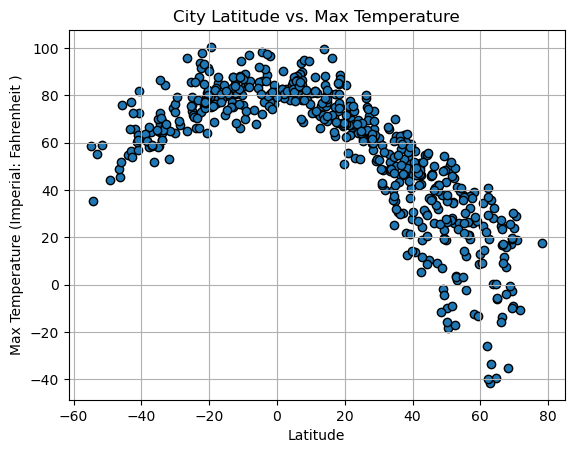

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
latitudes = [city['Lat'] for city in city_data]
max_temps = [city['Max Temp'] for city in city_data]
date = [city['Date'] for city in city_data]

# Incorporate the other graph properties
plt.scatter(latitudes, max_temps, edgecolors='black')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Imperial: Fahrenheit )')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1_Actual.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

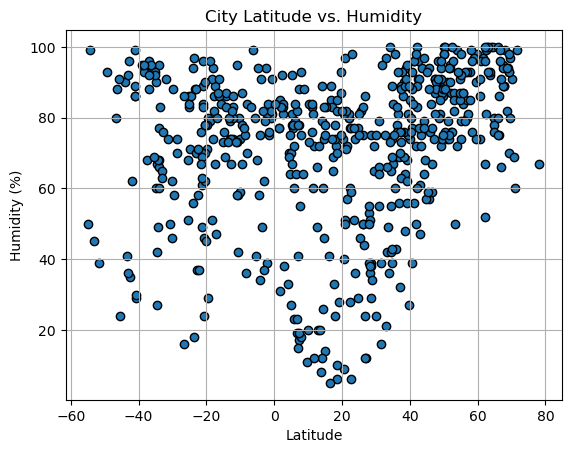

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
latitudes = [city['Lat'] for city in city_data]
humidities = [city['Humidity'] for city in city_data]

# Incorporate the other graph properties
plt.scatter(latitudes, humidities, edgecolors='black')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2_Actual.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

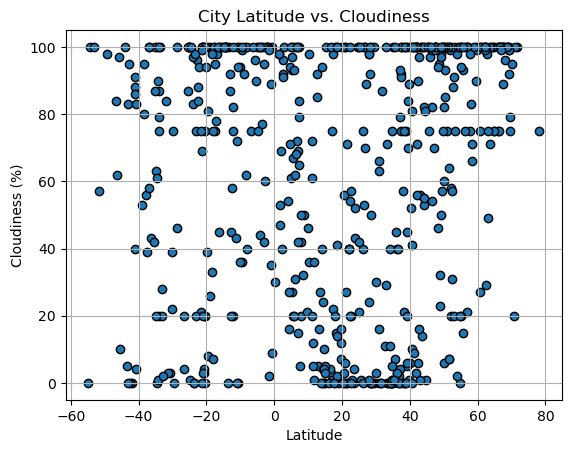

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitudes = [city['Lat'] for city in city_data]
cloudiness_values = [city['Cloudiness'] for city in city_data]

# Incorporate the other graph properties
plt.scatter(latitudes, cloudiness_values, edgecolors='black')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig3_Actual.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

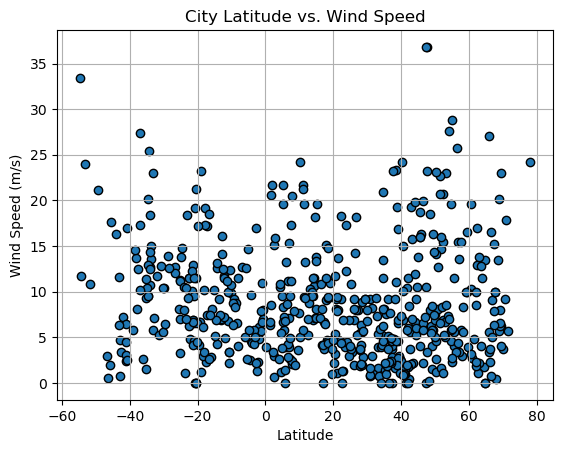

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitudes = [city['Lat'] for city in city_data]
wind_speeds = [city['Wind Speed'] for city in city_data]

# Incorporate the other graph properties
plt.scatter(latitudes, wind_speeds, edgecolors='black')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig4_Actual.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

def linear_regression_hemisphere(df, x_column, y_column, xlabel='X-axis', ylabel='Y-axis', title='Linear Regression Plot'):

    # Extract x and y data from the filtered DataFrame
    x_data = df[x_column]
    y_data = df[y_column]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Create regression line
    regression_line = slope * np.array(x_data) + intercept

    # Plot scatter plot
    plt.scatter(x_data, y_data, label='Data Points')

    # Plot regression line
    plt.plot(x_data, regression_line, color='red', label='Linear Regression Line')

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Display the model's formula
    formula_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(1.05, 0.5, formula_text, transform=plt.gcf().transFigure, ha='left', va='center', bbox=dict(facecolor='white', alpha=0.7))
    
    # Display the r-value
    r_value_text = f'R-value = {r_value:.2f}'
    plt.text(0.5, 1.1, r_value_text, transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7))

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

northern_hemi_df.to_csv("../output_data/northern_hemi.csv", index_label="City_ID")

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,59.14,64,100,23.29,PT,1703609800
1,al wajh,26.2455,36.4525,78.75,50,40,9.22,SA,1703609800
2,khost,33.3395,69.9204,51.87,42,0,1.66,AF,1703609801
3,badger,64.8000,-147.5333,-5.93,80,75,0.00,US,1703609801
4,iqaluit,63.7506,-68.5145,0.43,92,71,4.09,CA,1703609801


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

southern_hemi_df.to_csv("../output_data/southern_hemi.csv", index_label="City_ID")

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,port-aux-francais,-49.3500,70.2167,44.10,93,98,21.12,TF,1703609804
8,waitangi,-43.9535,-176.5597,54.82,90,100,16.31,NZ,1703609804
9,ta`u,-14.2336,-169.5144,79.77,86,100,12.57,AS,1703609804
12,ushuaia,-54.8000,-68.3000,58.62,50,0,33.38,AR,1703609769
13,bredasdorp,-34.5322,20.0403,64.54,67,100,20.11,ZA,1703609805


###  Temperature vs. Latitude Linear Regression Plot

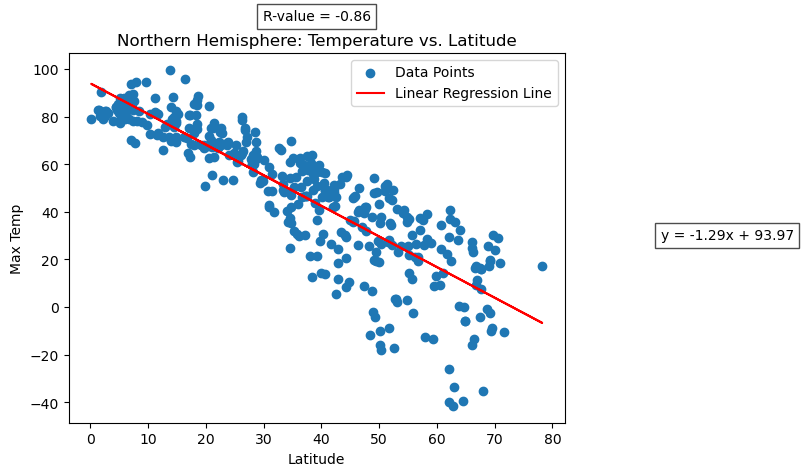

In [17]:
# Linear regression on Northern Hemisphere
df = pd.read_csv("../output_data/northern_hemi.csv")
linear_regression_hemisphere(df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp', 'Northern Hemisphere: Temperature vs. Latitude')

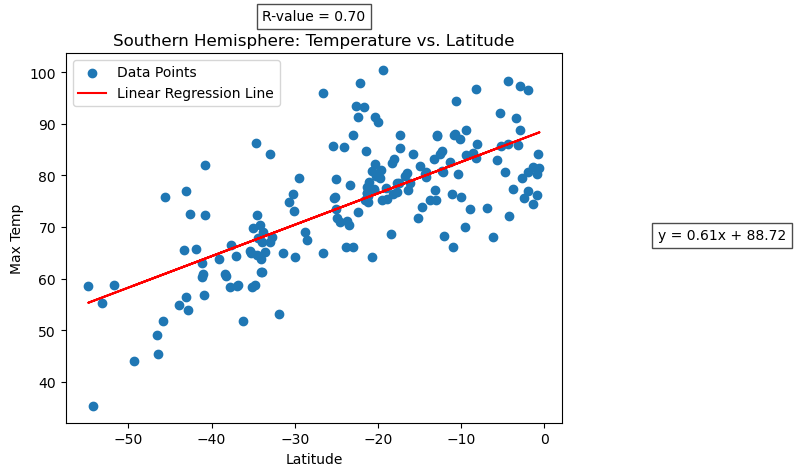

In [18]:
# Linear regression on Southern Hemisphere
df = pd.read_csv("../output_data/southern_hemi.csv")
linear_regression_hemisphere(df, 'Lat', 'Max Temp', 'Latitude', 'Max Temp', 'Southern Hemisphere: Temperature vs. Latitude')

**Discussion about the linear relationship:** For the northern hemisphere, the regression line fits the data very well, with the southern hemisphere having a regression line that fits the data well but not as well compared to the northern hemisphere. Perhaps this is partly due to the majority of the land mass of the planet being in the northern hemisphere. More land than water and vice versa might have slightly different weather and warming patterns. Also, there may be more locations collecting weather data in the northern hemisphere compared to the southern hemisphere, allowing readings in the north to be more accurate. Both graphs show that as you move away from the equator (0 degrees) the maximum temperatures decreases. So based on the regression lines, I can confidently say that as the distance from the equator increases, both in the northern or southern hemispheres, the maximum temperature at each latitude will decrease.

### Humidity vs. Latitude Linear Regression Plot

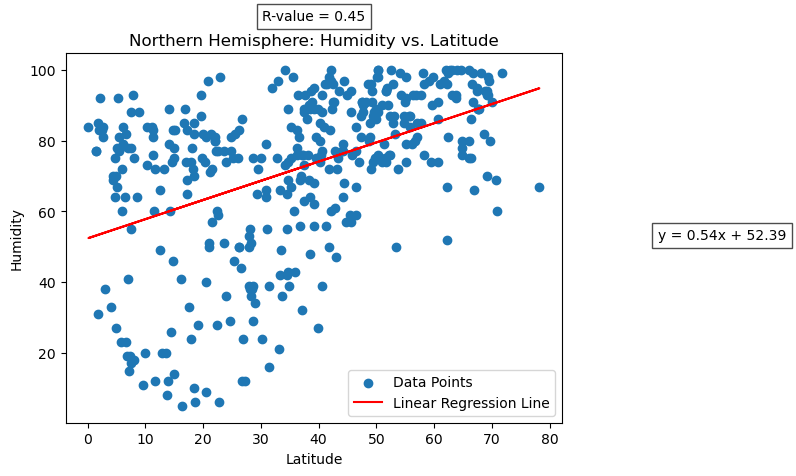

In [25]:
# Northern Hemisphere
df = pd.read_csv("../output_data/northern_hemi.csv")
linear_regression_hemisphere(df, 'Lat', 'Humidity', 'Latitude', 'Humidity', 'Northern Hemisphere: Humidity vs. Latitude')

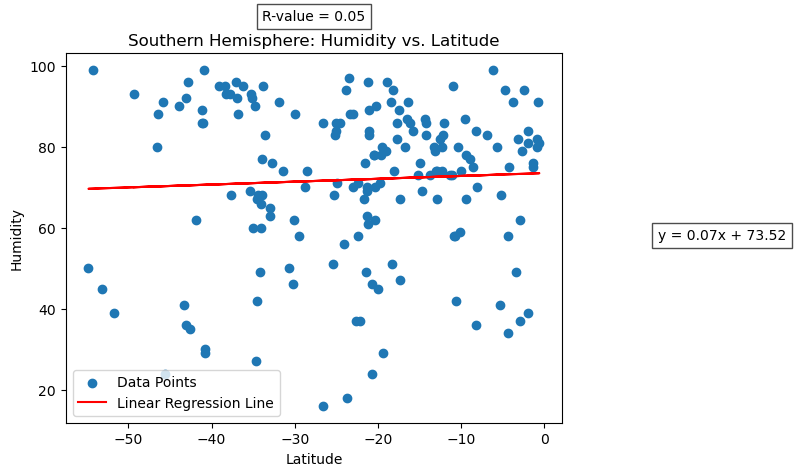

In [26]:
# Southern Hemisphere
df = pd.read_csv("../output_data/southern_hemi.csv")
linear_regression_hemisphere(df, 'Lat', 'Humidity', 'Latitude', 'Humidity', 'Southern Hemisphere: Humidity vs. Latitude')

**Discussion about the linear relationship:** For the northern hemisphere, the regression line does not fit the data very well, the same with the southern hemisphere having a regression line not fitting the data well. For the northern hemisphere, the graph seems to show that generally, the farther you are from the equator there is more humidity in the air (the range seems to fall between around 50%-100% compared to latitudes closer to the equator which have a range between 0% - 100%). For the southern henisphere, latitude does not seem to have an affect on humidity in the air. Perhaps very very slightly, the closer you are to the equator you will experience overall more humidity than closer to the south pole. But there is more uncertainty based on the regresssion line.

### Cloudiness vs. Latitude Linear Regression Plot

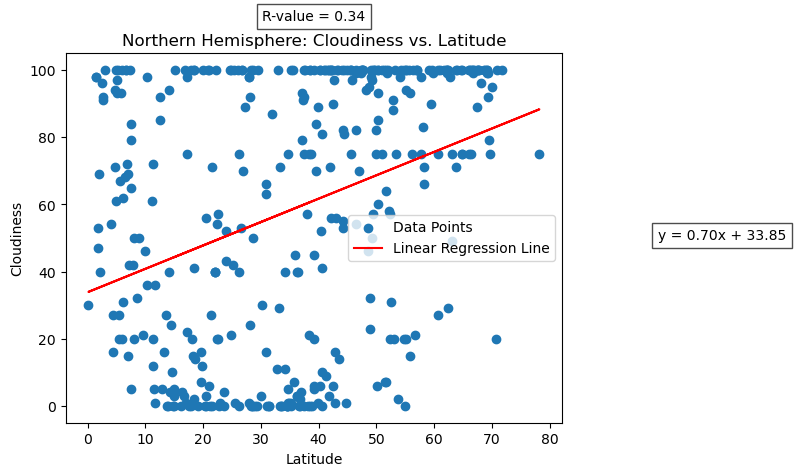

In [21]:
# Northern Hemisphere
df = pd.read_csv("../output_data/northern_hemi.csv")
linear_regression_hemisphere(df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Northern Hemisphere: Cloudiness vs. Latitude')

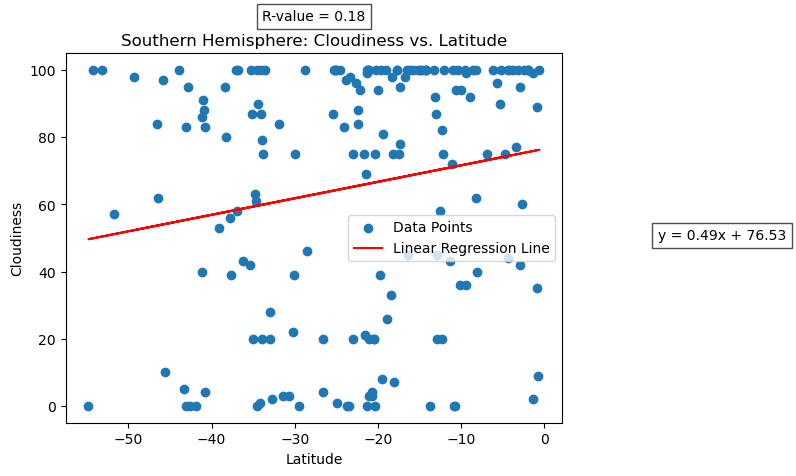

In [22]:
# Southern Hemisphere
df = pd.read_csv("../output_data/southern_hemi.csv")
linear_regression_hemisphere(df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Southern Hemisphere: Cloudiness vs. Latitude')

**Discussion about the linear relationship:** For northern hemisphere: regression line does not fit the data very well. For the most part latitude and distance from equator does not seem to have a direct affect on the cloudiness of a location. However, there seems to be a very slight trend that the farther the latitude is from the equator, the cloudier the location may be. But the certainty of this is minimal. There is much variance and range in the data points, and other factors besides latitude need to be evaluated with cloudiness. For the southern hemisphere: regression line does not fit data very well. for the most part, latitude and distance from the equator has no affect on the cloudiness of a location. However, there may be a very slight trend that the closer the latitude is to the equator the cloudier the location may be. But the certainty is minimal. Thre is much varience and range in the data points across the latitudes. Other factors should be evaluated with cloudiness other than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

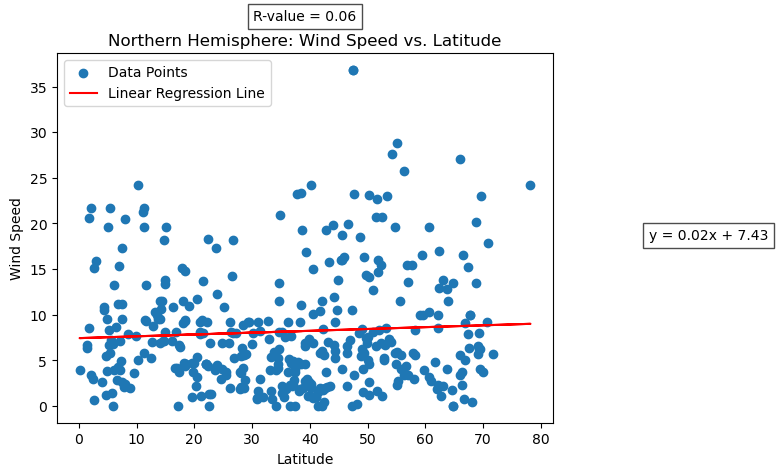

In [27]:
# Northern Hemisphere
df = pd.read_csv("../output_data/northern_hemi.csv")
linear_regression_hemisphere(df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Northern Hemisphere: Wind Speed vs. Latitude')

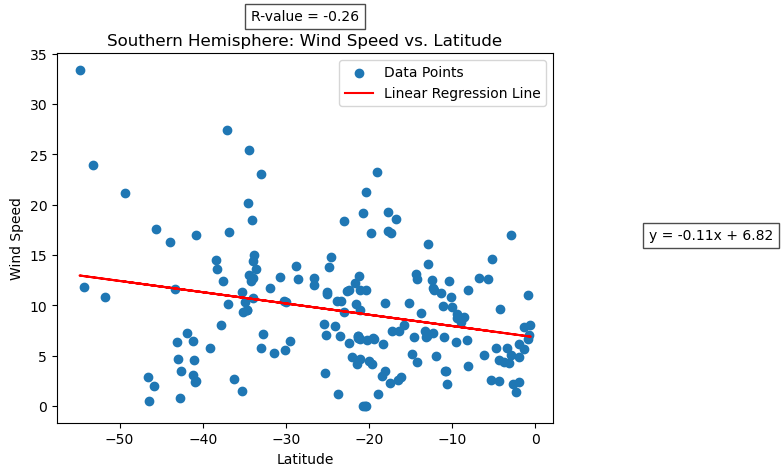

In [24]:
# Southern Hemisphere
df = pd.read_csv("../output_data/southern_hemi.csv")
linear_regression_hemisphere(df, 'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Southern Hemisphere: Wind Speed vs. Latitude')

**Discussion about the linear relationship:** For both the northern and southern hemispheres the regression line does not fit the data very well. I cannot say with certainty that the farther the latitude is from the equator the more or less windy a location will be. Other factors should be evaluated with wind speed besides latitude. overall, it seems that in the nothern hemisphere, alothough wind speeds vary across latitude, wind speeds generally stay on the lower end between 0 - 15 with speeds greater than this becoming more sparse across the latitudes. In the southern hemisphere, I cannot say with certainty that the farther the latitude is from the equator the more or less windy a location will be. Other factors should be evaluated with wind speed besides latitude. overall, it seems that in the southern hemisphere, alothough wind speeds vary across latitude, the range of wind speed becomes smaller the closer the latitude is to the equator. More extreme wind sppeds seem to occur that farther the latitude is from the equator.